# Fandango's Movie Ratings Analysis

### Data source:
#### https://fivethirtyeight.com/features/fandango-movies-ratings/

In [1]:
#libriaries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Fandango's data

In [2]:
#creating data frame (import from csv file)
fandango = pd.read_csv('fandango_scrape.csv')

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Votes vs rating

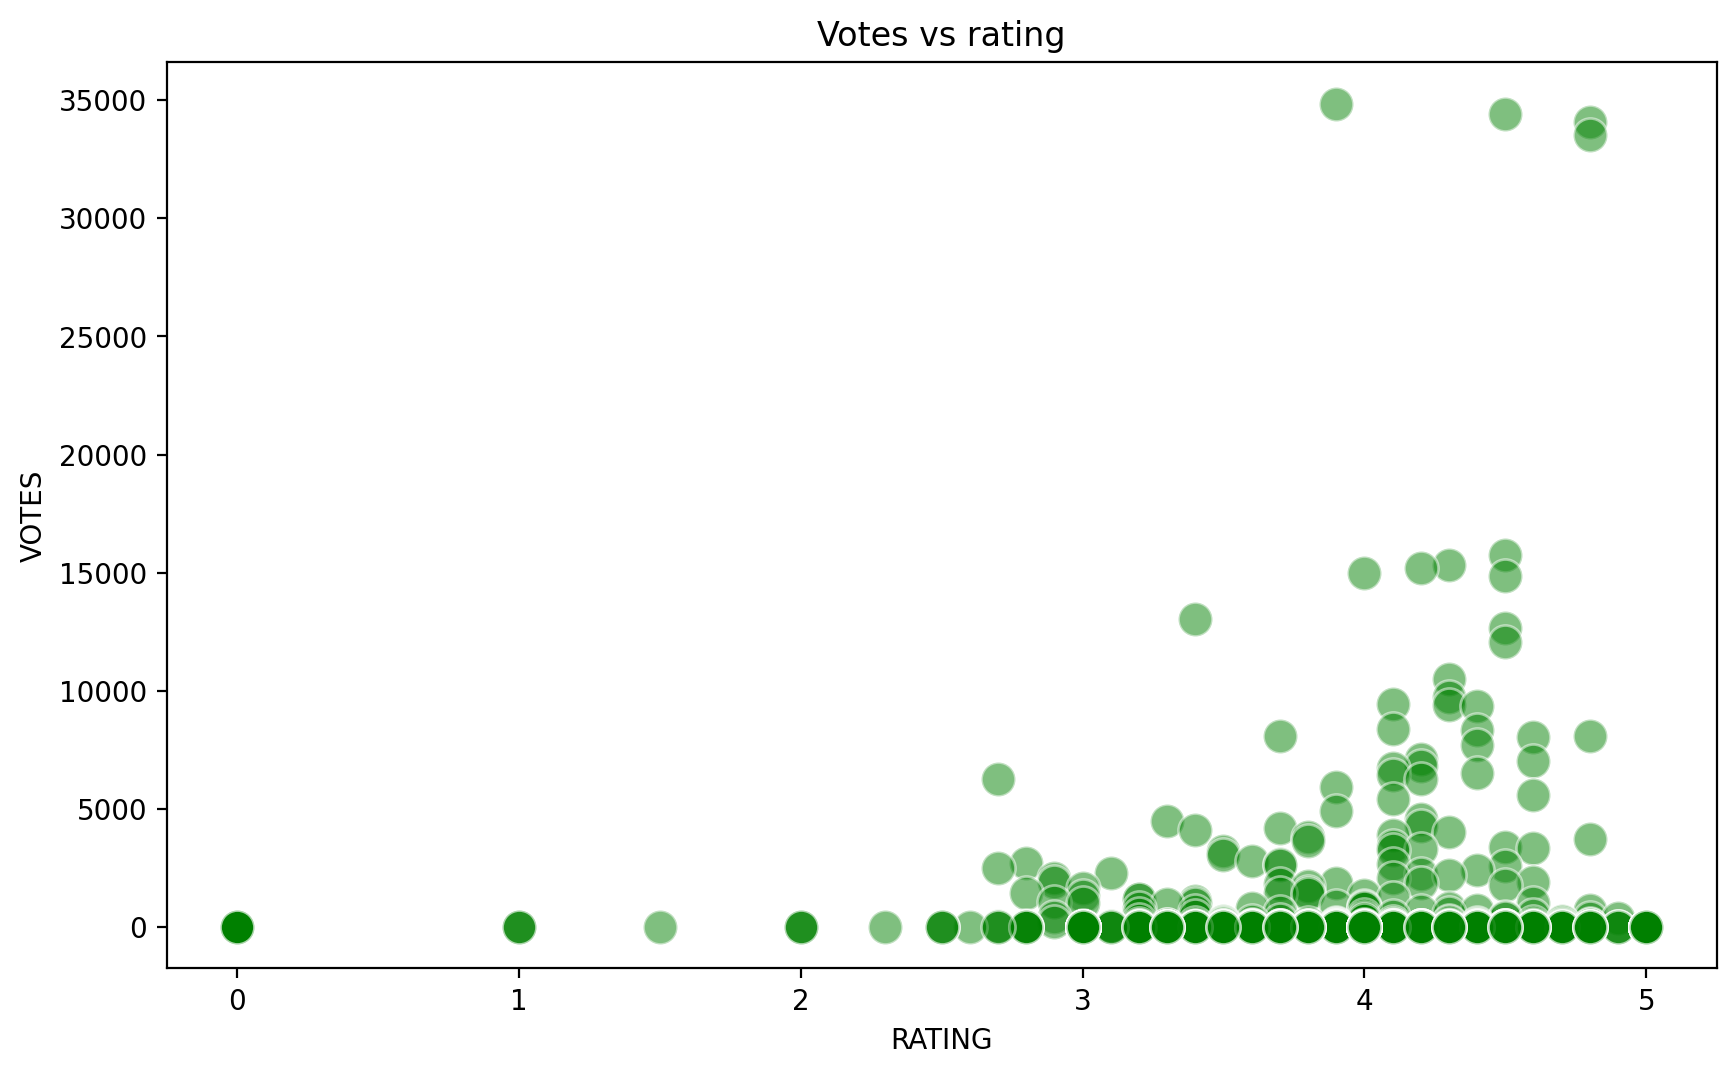

In [6]:
plt.figure(figsize=(10,6), dpi=200) #plot size
sns.scatterplot(data=fandango, x='RATING', y='VOTES',s=150, alpha=0.5, color='green')
plt.title('Votes vs rating')
plt.show()

#### 75% of movies received less than 189 votes

### Correlation between columns

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Extracting year from the "FILM" column, adding new "YEAR" column

In [8]:
#function definition
#def get_year(film):
    #return int(film[-5:-1])

#YEAR from FILM column
#fandango['YEAR'] = fandango['FILM'].apply(get_year)    

fandango['YEAR'] = fandango['FILM'].apply(lambda film:int(film[-5:-1])) #using lambda expression  

In [9]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


### Movies per year

In [10]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
2012      1
1964      1
Name: YEAR, dtype: int64

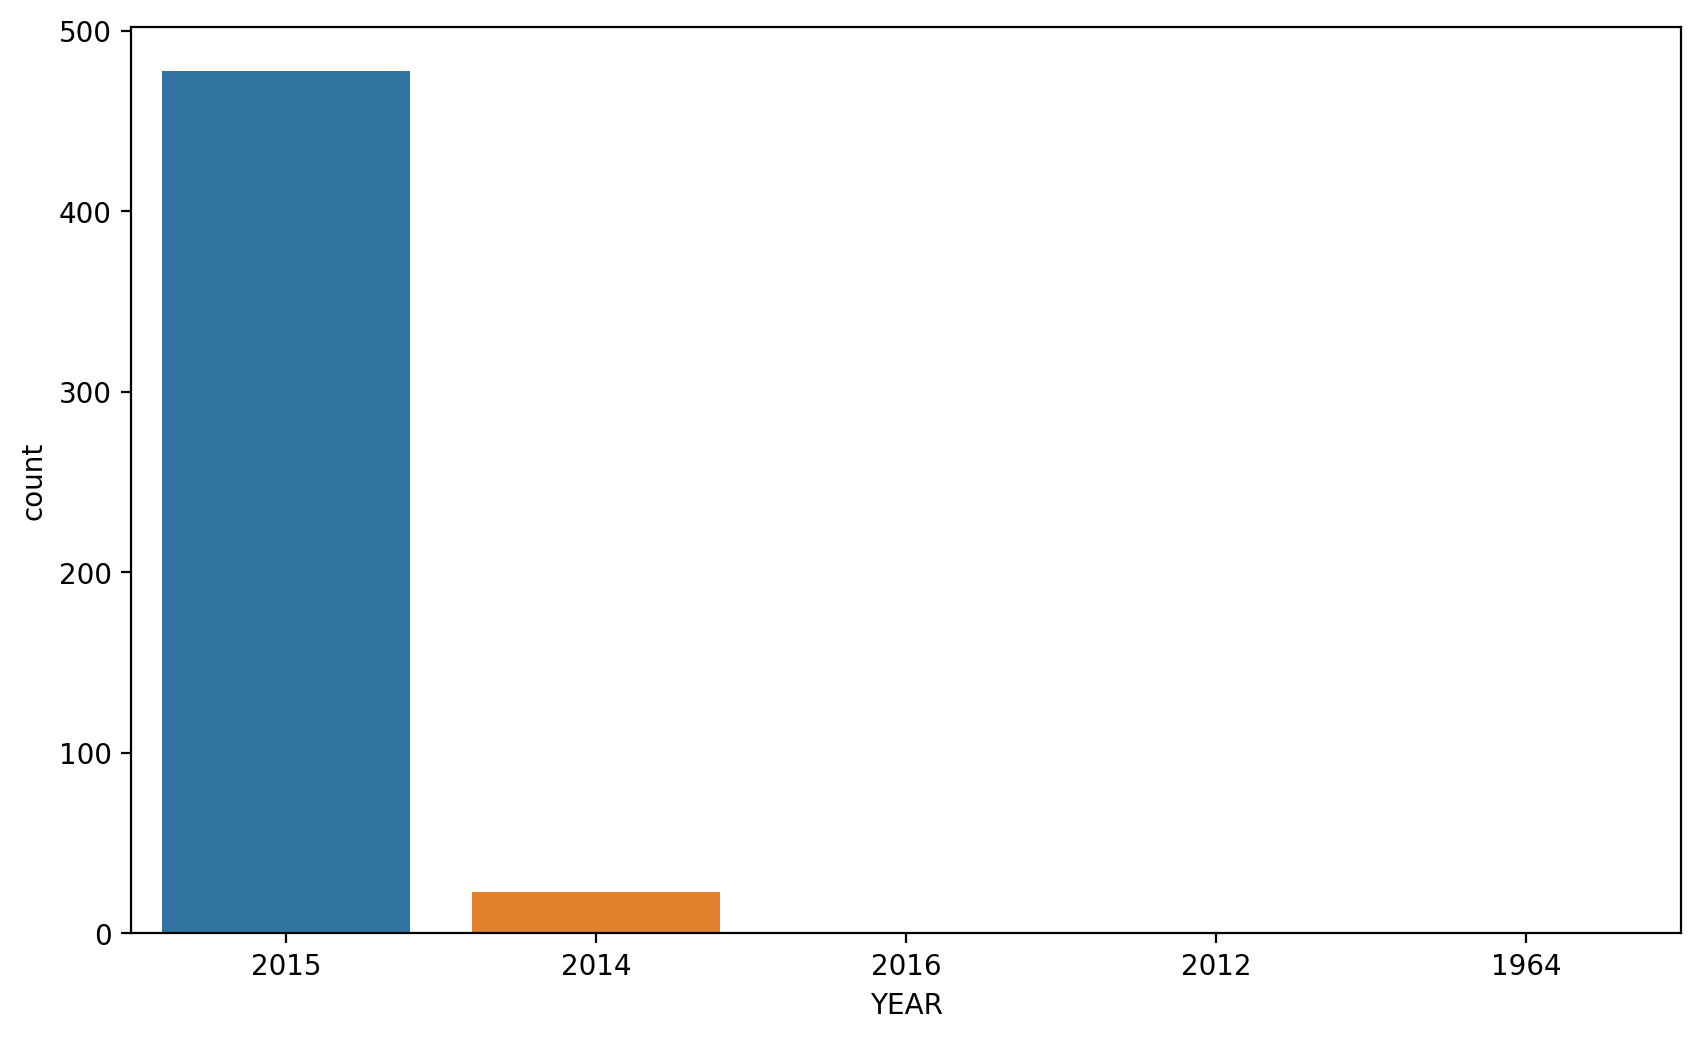

In [11]:
plt.figure(figsize = (10,6), dpi=200)
sns.countplot(data=fandango, x='YEAR', order = fandango['YEAR'].value_counts().index)
plt.show()

### TOP10 movies with the highest number of votes

In [12]:
top10_votes = fandango.sort_values(by=['VOTES'], axis=0, ascending=False)
top10_votes = top10_votes[0:10]
top10_votes

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### Movies with 0 votes

In [13]:
no_votes = fandango[fandango['VOTES'] == 0]
len(no_votes.index)

69

### Data frame without movies with 0 votes

In [14]:
fandango_voted = fandango[fandango['VOTES']>0]
#fandango_voted['VOTES'].unique()

### True user rating vs diplayed star rating

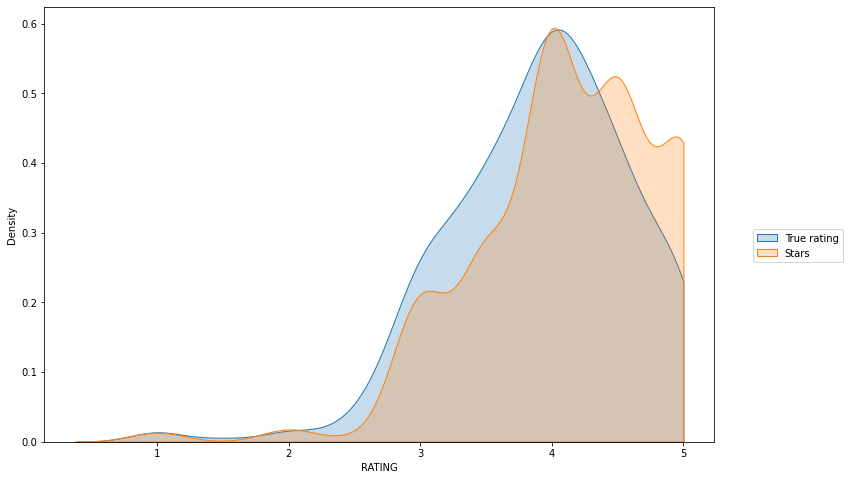

In [15]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=fandango_voted, x='RATING', clip=(0,5), label='True rating', fill=True)
sns.kdeplot(data=fandango_voted, x='STARS', clip=(0,5), label='Stars', fill=True)

plt.legend(bbox_to_anchor=(1.2,0.5))

### Difference between STARS and TRUE RATING

In [16]:
fandango_voted['STARS_DIFF'] = fandango_voted['STARS'] - fandango_voted['RATING']
fandango_voted['STARS_DIFF'] = fandango_voted['STARS_DIFF'].round(2)
fandango_voted

/home/luka/anaconda3/envs/Udemy/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/luka/anaconda3/envs/Udemy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

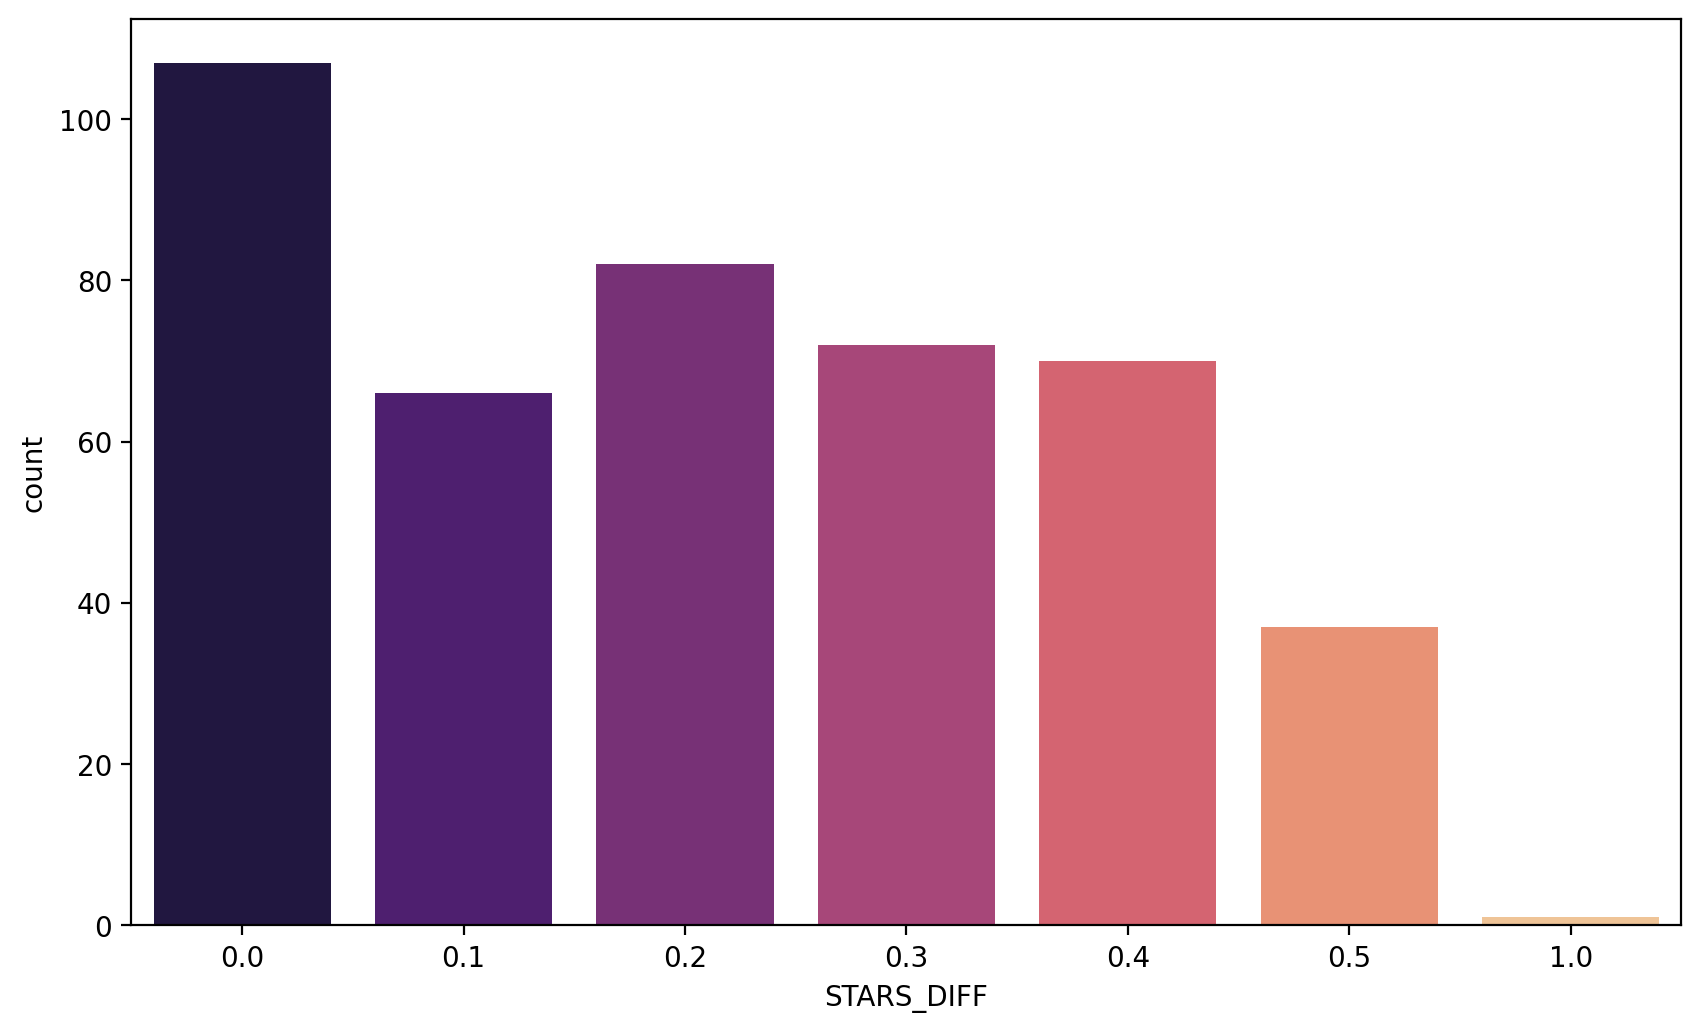

In [17]:
plt.figure(figsize = (10,6), dpi=200)
sns.countplot(data=fandango_voted, x='STARS_DIFF', palette='magma')

In [18]:
fandango_voted.sort_values(by=['STARS_DIFF'],ascending=False, axis=0)[:1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Fandango's rating vs other sites

In [19]:
#data import from csv file
all_sites = pd.read_csv('all_sites_scores.csv')

In [20]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [21]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [22]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Rotten Tomatoes

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

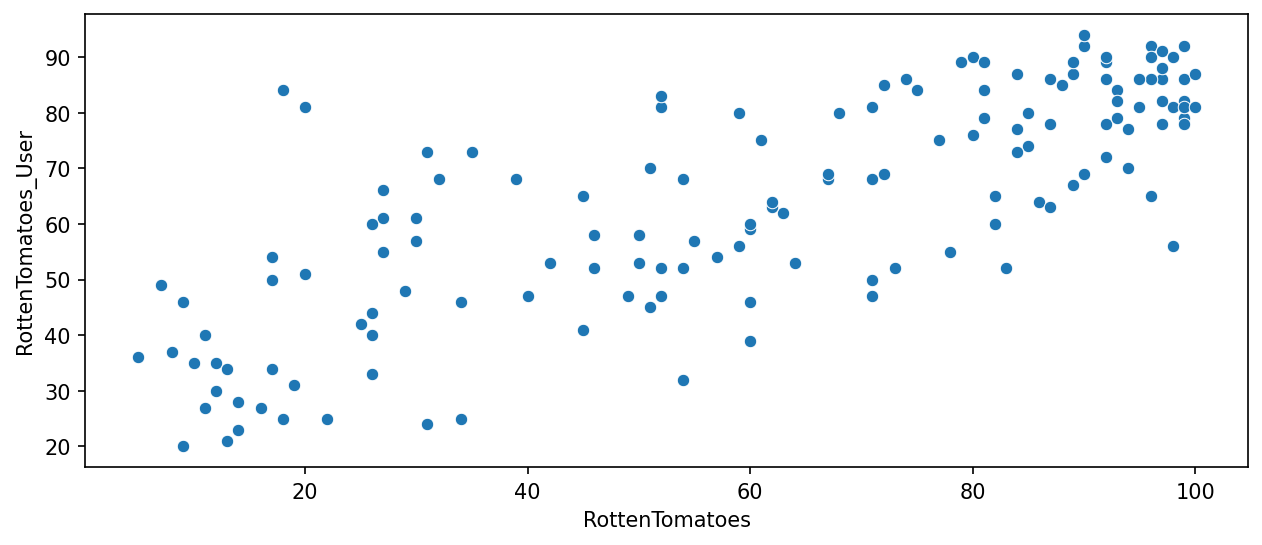

In [23]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')

### Rotten - critics vs users difference

In [24]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [25]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff'],
      dtype='object')

#### Mean - from absolute values

In [26]:
all_sites['Rotten_Diff'].abs().describe()['mean'].round(2)

15.1

Text(0.5, 1.0, 'RottenTomatos: critis - users score')

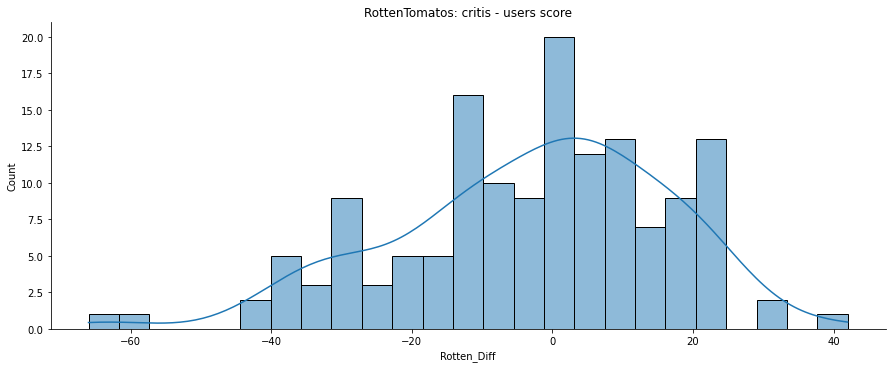

In [27]:
sns.displot(data=all_sites, x='Rotten_Diff', kde=True, height=5, aspect=2.5, bins=25)
plt.title('RottenTomatos: critis - users score')

Text(0.5, 1.0, 'RottenTomatos: critis - users score (absolute value)')

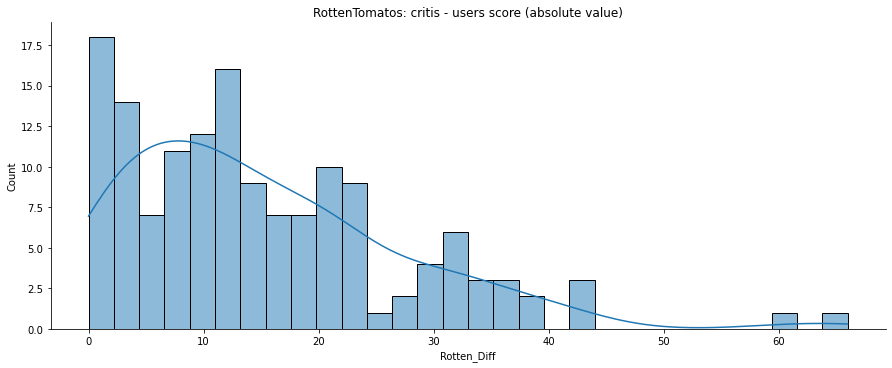

In [28]:
sns.displot(data=all_sites['Rotten_Diff'].abs(), bins=30, kde=True, height=5, aspect=2.5)
plt.title('RottenTomatos: critis - users score (absolute value)')

#### TOP5 movies users rated higher than critics

In [29]:
all_sites.sort_values(by=['Rotten_Diff'], ascending=True)[['FILM','Rotten_Diff']][:5]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


#### TOP5 movies critics rated higher than users

In [30]:
all_sites.sort_values(by=['Rotten_Diff'], ascending=False)[['FILM','Rotten_Diff']][:5]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

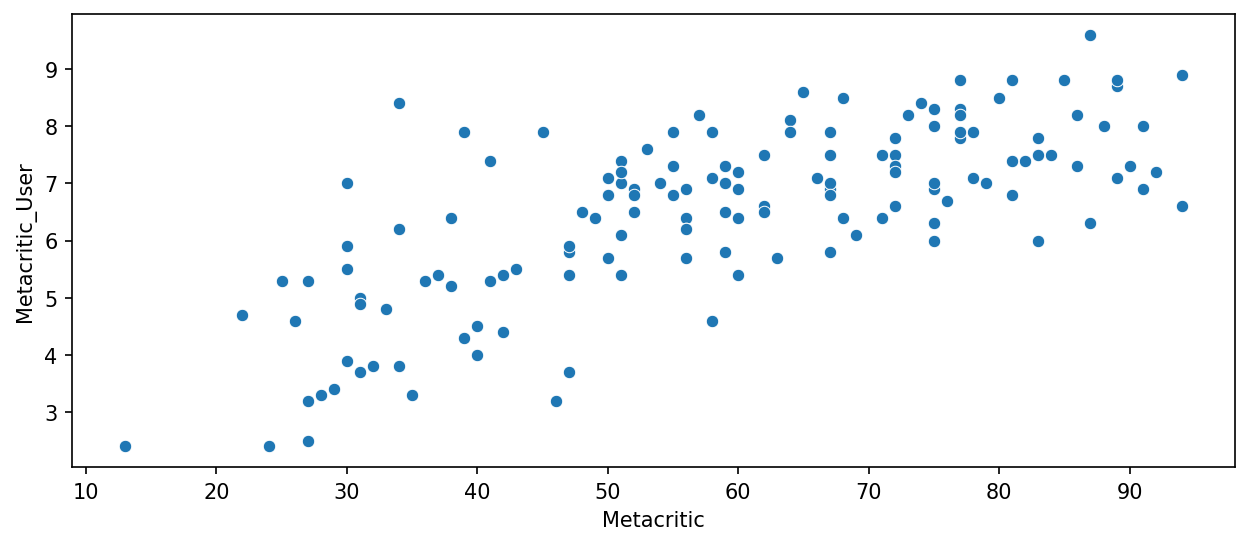

In [31]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')

### IMDB vs MetaCritic vote count

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

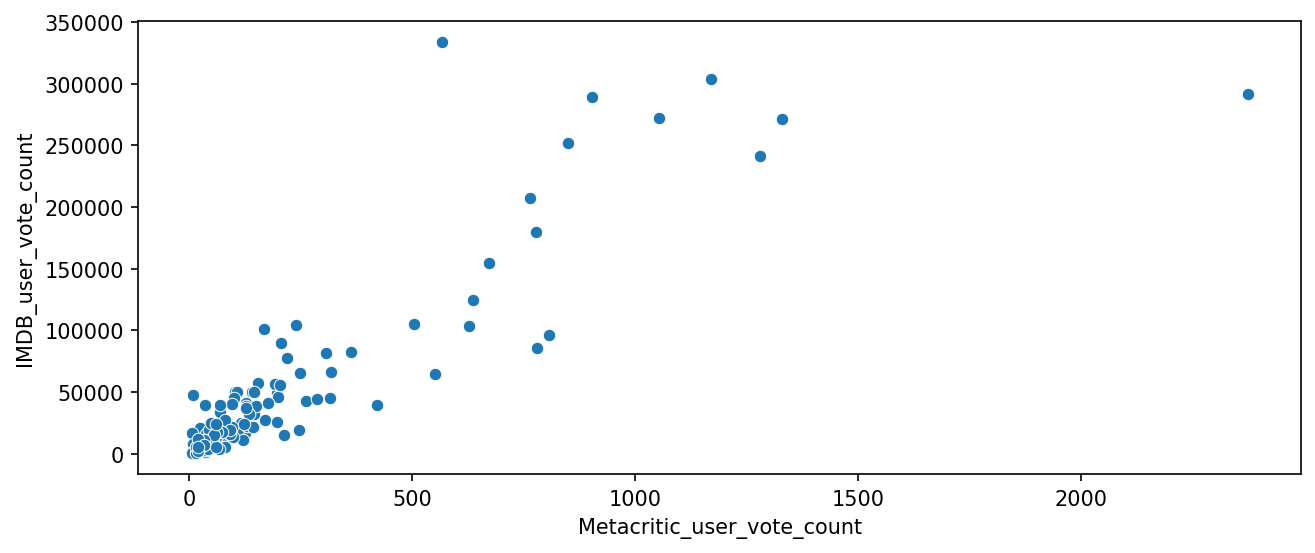

In [32]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

### TOP1 IMDB user vote count movie

In [33]:
all_sites.iloc[all_sites['IMDB_user_vote_count'].idxmax()]


FILM                          The Imitation Game (2014)
RottenTomatoes                                       90
RottenTomatoes_User                                  92
Metacritic                                           73
Metacritic_User                                     8.2
IMDB                                                8.1
Metacritic_user_vote_count                          566
IMDB_user_vote_count                             334164
Rotten_Diff                                          -2
Name: 14, dtype: object

### TOP1 MetaCritic user vote count movie

In [34]:
all_sites.iloc[all_sites['Metacritic_user_vote_count'].idxmax()]

FILM                          Mad Max: Fury Road (2015)
RottenTomatoes                                       97
RottenTomatoes_User                                  88
Metacritic                                           89
Metacritic_User                                     8.7
IMDB                                                8.3
Metacritic_user_vote_count                         2375
IMDB_user_vote_count                             292023
Rotten_Diff                                           9
Name: 88, dtype: object

## Fandango vs others

In [35]:
#data frame merge (Fandango + all_sites)

In [36]:
all_scores = pd.merge(fandango, all_sites, how='inner', on='FILM')

In [37]:
all_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int64  
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(8), object(1)


In [38]:
all_scores.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [39]:
#scores normalizing (to Fandango's 5 star scale)

In [40]:
#RottenTomatoes
all_scores['RT_Norm']=all_scores['RottenTomatoes']/20
all_scores['RT_U_Norm']=all_scores['RottenTomatoes_User']/20

#Metacritic
all_scores['MC_Norm']=all_scores['Metacritic']/20
all_scores['MC_U_Norm']=all_scores['Metacritic_User']/2

#IMDB
all_scores['IMDB_Norm']=all_scores['IMDB']/2

In [41]:
all_scores.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RT_U_Norm,MC_Norm,MC_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.90,4.50,4.70,4.45,4.30


In [70]:
#new data frame with only normalized values
norm_scores = pd.DataFrame()
norm_scores = norm_scores.append(other=all_scores[['FILM','STARS','RATING','RT_Norm','RT_U_Norm','MC_Norm','MC_U_Norm','IMDB_Norm']])

In [71]:
norm_scores.head()

,FILM,STARS,RATING,RT_Norm,RT_U_Norm,MC_Norm,MC_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45,4.30


Text(0.5, 1.0, 'Ratings comparison')

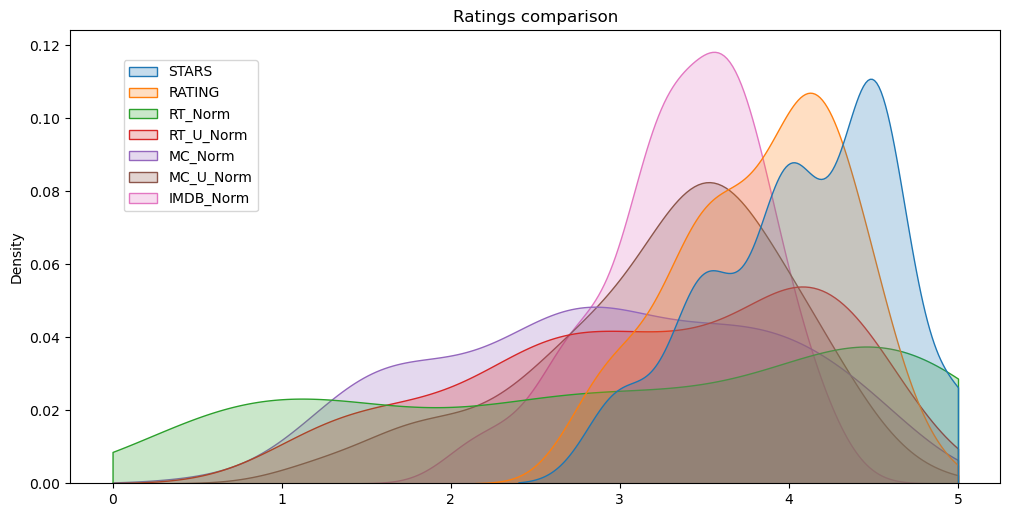

In [72]:
plt.figure(figsize=(12,6),dpi=100)


ax = sns.kdeplot(data=norm_scores, shade=True, clip=(0,5))
ax.legend_.set_bbox_to_anchor((0.05, 0.95))
ax.legend_._set_loc(2)

plt.title('Ratings comparison')

Text(0.5, 1.0, "Fandango's stars vs RottenTomatoes Critics")

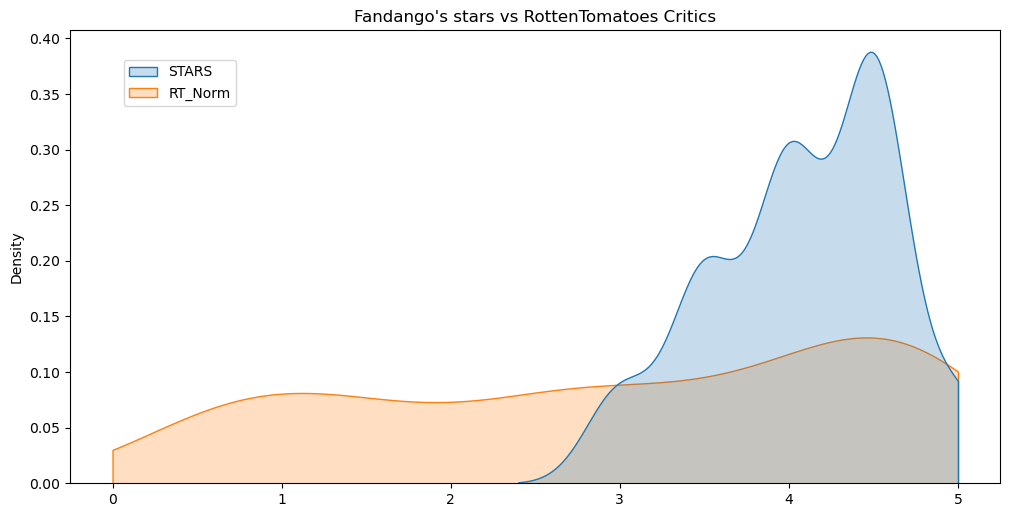

In [73]:
plt.figure(figsize=(12,6),dpi=100)
ax = sns.kdeplot(data=norm_scores[['STARS','RT_Norm']], shade=True, clip=(0,5))
ax.legend_.set_bbox_to_anchor((0.05, 0.95))
ax.legend_._set_loc(2)

plt.title("Fandango's stars vs RottenTomatoes Critics")

### Cluster map of normalized scores

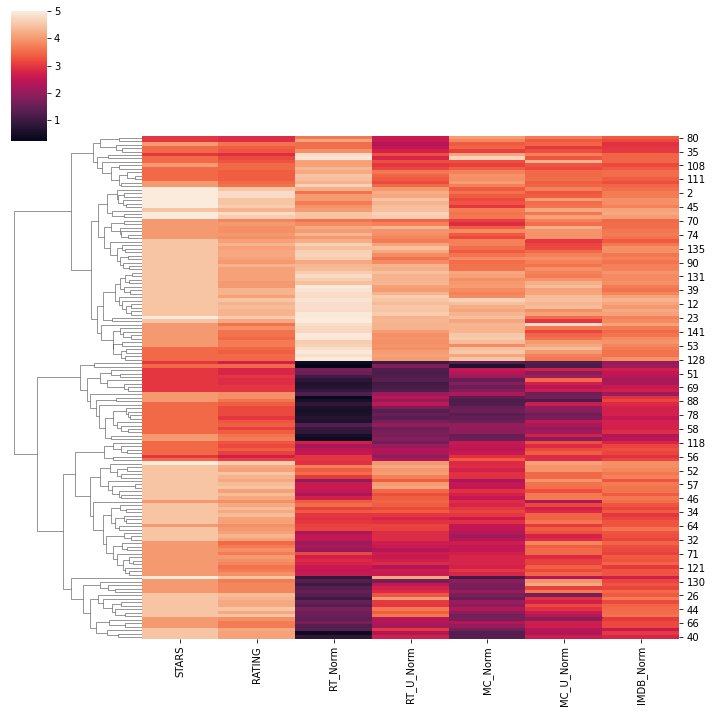

In [74]:
sns.clustermap(norm_scores.drop('FILM',axis=1), col_cluster=False)

### TOP10 lowest rated movies according to RottenTomatoes

In [75]:
top10_lowest_acc_RT = norm_scores.sort_values(by='RT_Norm')[:10]
top10_lowest_acc_RT

,FILM,STARS,RATING,RT_Norm,RT_U_Norm,MC_Norm,MC_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,1.80,0.65,1.20,2.15
84,Hitman: Agent 47 (2015),4.0,3.9,0.35,2.45,1.40,1.65,2.95
54,Hot Pursuit (2015),4.0,3.7,0.40,1.85,1.55,1.85,2.45
25,Taken 3 (2015),4.5,4.1,0.45,2.30,1.30,2.30,3.05
28,Fantastic Four (2015),3.0,2.7,0.45,1.00,1.35,1.25,2.00
50,The Boy Next Door (2015),4.0,3.6,0.50,1.75,1.50,2.75,2.30
88,The Loft (2015),4.0,3.6,0.55,2.00,1.20,1.20,3.15
87,Unfinished Business (2015),3.5,3.2,0.55,1.35,1.60,1.90,2.70
78,Mortdecai (2015),3.5,3.2,0.60,1.50,1.35,1.60,2.75
77,Seventh Son (2015),3.5,3.2,0.60,1.75,1.50,1.95,2.75


<AxesSubplot:ylabel='Density'>

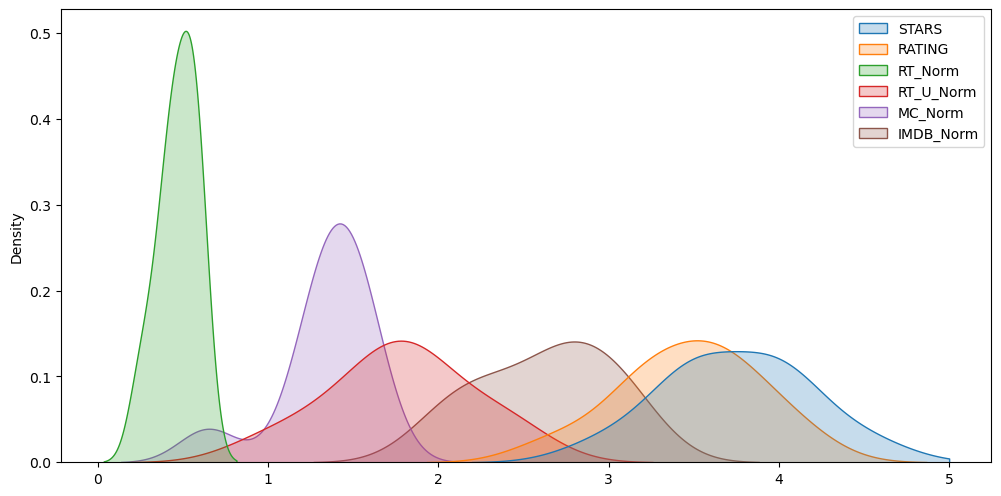

In [55]:
plt.figure(figsize=(12,6),dpi=100)
sns.kdeplot(data=top10_lowest_acc_RT, clip=(0,5), shade=True)

In [81]:
taken_avg_other = top10_lowest_acc_RT.drop(['STARS','RATING'],axis=1).sum(axis=1)[25]
taken_avg_other = taken_avg_other/5
taken_avg_other.round(2)

1.88

## Fandango is showing 3-4 stars even for bad movies.
## F.e. Taken 3:
    Fandango stars: 4.5
    Average from other platforms: 1.9